# **XGBoost Assignment 6**

**Study these topics: bias vs. variance tradeoff, bagging and boosting approaches, ensemble approach, model complexity, and XGBoost algorithm.**

**What is Bias?**
The bias is the discrepancy between our model's average forecast and the actual number we are attempting to predict. High bias models oversimplify the model and pay little attention to the training data. On training and test data, it consistently results in high error.

**What is Variance?**
Variance is the variability of a model's forecast for a certain data point or value, which indicates how widely distributed our data are. A model with a large variance pays close attention to the training data and does not generalize to new data. As a result, these models have significant error rates on test data yet perform quite well on training data.

**Bagging & Boosting Apporaches:**
**Bootstrap Aggregating**, also known as bagging, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It decreases the variance and helps to avoid overfitting. It is usually applied to decision tree methods. Bagging is a special case of the model averaging approach.
**Boosting** is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers. It is done by building a model by using weak models in series.

**Ensemble Approach:**
Ensemble learning is a machine learning paradigm where multiple models (often called “weak learners”) are trained to solve the same problem and combined to get better results. The main hypothesis is that when weak models are correctly combined, we can obtain more accurate and/or robust models. There are 3 Approaches of Ensemble Methods: 1. Bagging 2. Boosting 3. Stacking

**Model Complexity:**
Model complexity is a measure of how accurately a machine learning model can predict unseen data, as well as how much data the model needs to see in order to make good predictions.

**XGBoost:**
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree-based algorithms are considered best-in-class right now.

**Apply XGBoost classification algorithm on the loan data set and compare its performance against SVM and Logistic Regression by suitably splitting the data into train and test sets.**

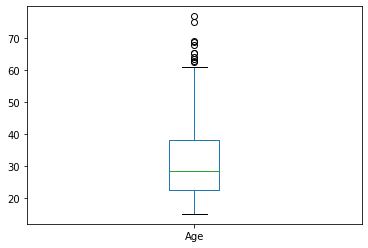

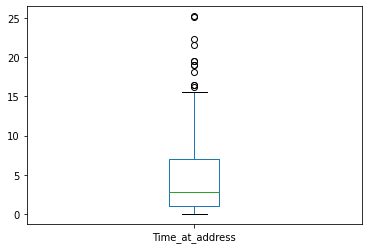

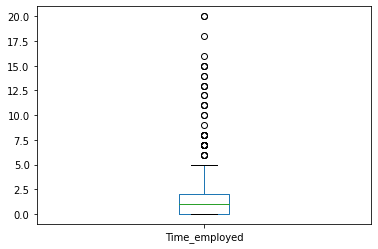

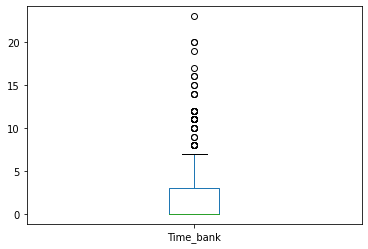

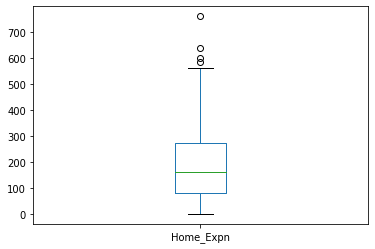

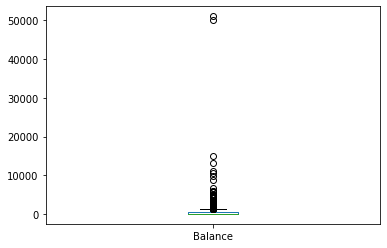

In [5]:
from pandas.tseries.offsets import YearEnd
import pandas as pd
import numpy as np
from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from statsmodels.api import OLS


## Fetching Loan Dataset and using One-Hot Encoding on Categorical Columns for conversion in numeric values ##
loan = pd.read_excel('loan.xlsx',sheet_name='loan')
loan['Decision'] = loan['Decision'].replace(['accept','reject'],[1,0])
loan = pd.get_dummies(loan, columns=['Sex','Res_status','Telephone','Occupation','Job_status','Liab_ref','Acc_ref'])
loan.columns


## Plotting Boxplot to identify outliers in each columns ##
def box_plot(loan, feature):
  loan.boxplot(column = feature)
  plt.grid(False)
  plt.show()
  
cols =['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Home_Expn', 'Balance']
for col in cols:
  box_plot(loan, col)


## Defining outliers in each columns and removing them to pre-process data ##
def outlier(loan, feature):
  q1 = loan[feature].quantile(0.25)
  q3 = loan[feature].quantile(0.75)
  iqr = q3 - q1
  lb = q1 - 1.5 * iqr
  ub = q3 + 1.5 * iqr
  out_index = loan.index[(loan[feature] < lb) | (loan[feature] > ub)]
  return out_index

out_list = []
for feature in cols:
  out_list.extend(outlier(loan, feature))

def out_exc(loan, out_list):
  outlist = sorted(set(out_list))
  loan = loan.drop(outlist)
  return loan


## Normalizing Dataset ##
loan = out_exc(loan, out_list)
loan_scaled = normalize(loan)
loan_scaled = pd.DataFrame(loan_scaled, columns=loan.columns)
loan_scaled

categ = loan.drop(['Decision'],axis=1)
dep = loan[['Decision']]
X = np.array(categ)
Y = np.array(dep)


## Train Test Split to evaluate model ##
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy Score: 0.7096774193548387 



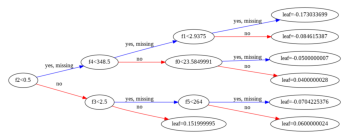

In [6]:
## Fitting XGBoost Classifier Model and calculating the accuracy score of the model ##
model = XGBClassifier()
model.fit(X_train,Y_train)
plot_tree(model, rankdir='LR')

Y_pred=model.predict(X_test)
print('\nAccuracy Score:',accuracy_score(Y_test,Y_pred),"\n")

In [7]:
## Fitting SVM Model with Linear Kernel of Cost Function default and CF 10 and getting the accuracy score of the model ##
svc=SVC(kernel='linear')
svc.fit(X_train,Y_train)
Y_pred1=svc.predict(X_test)
print('Linear SVM Kernel Accuracy Score with default CF:',metrics.accuracy_score(Y_test,Y_pred1),"\n")

svc1=SVC(kernel='linear',C=10)
svc1.fit(X_train,Y_train)
Y_pred2=svc1.predict(X_test)
print('Linear SVM Kernel Accuracy Score with 10 CF:',metrics.accuracy_score(Y_test,Y_pred2))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear SVM Kernel Accuracy Score with default CF: 0.6935483870967742 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear SVM Kernel Accuracy Score with 10 CF: 0.6774193548387096


In [8]:
## Fitting Logistric Regression Model and getting the accuracy score of the model ##
lr_model = LogisticRegression(solver='liblinear', random_state=0)
lr_model.fit(X_train, Y_train)
Y_pred3 = lr_model.predict(X_test)
print("Logistic Regression Accuracy Score:",accuracy_score(Y_test,Y_pred3))

Logistic Regression Accuracy Score: 0.6935483870967742


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Apply XGBoost regression algorithm on the Boston housing data set and compare its performance against Linear regression.**

In [9]:
! pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


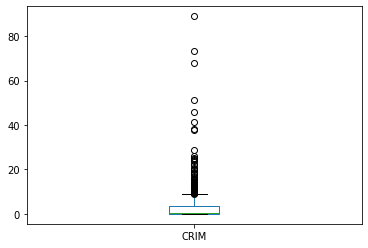

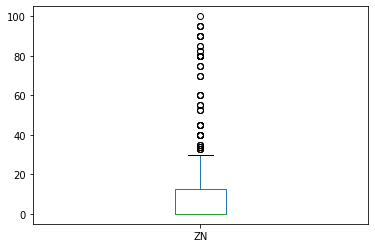

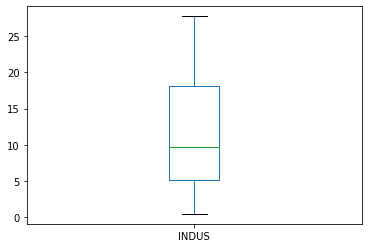

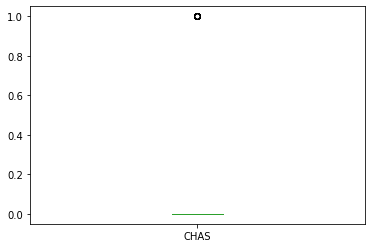

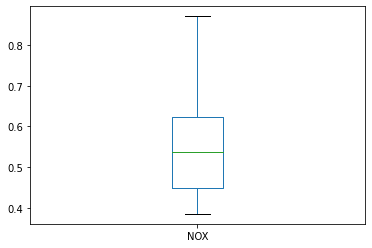

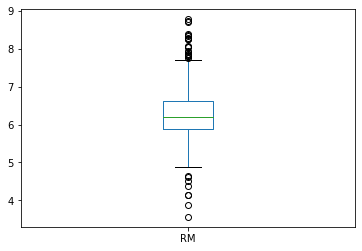

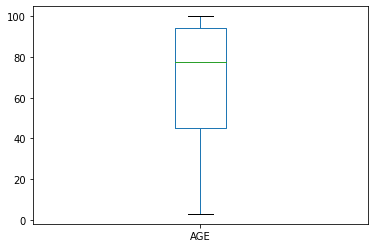

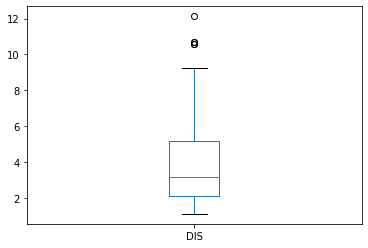

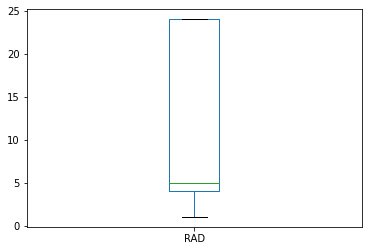

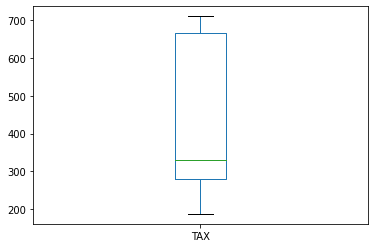

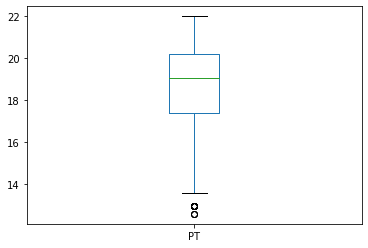

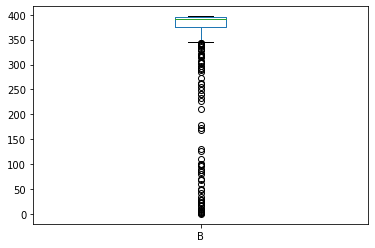

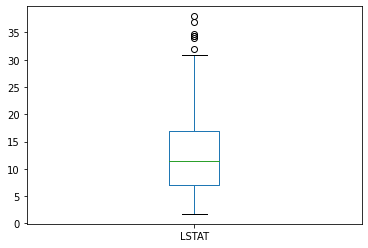

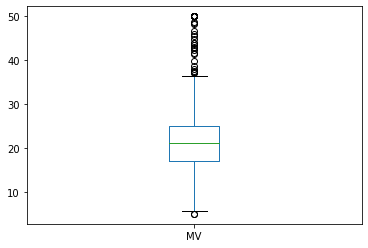

In [10]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from statsmodels.api import OLS


## Fetching Boston Housing Dataset ##
bos_hous = pd.read_excel('boston housing.xls')


## Plotting Boxplot to identify outliers in each columns ##
def box_plot(bos_hous, feature):
  bos_hous.boxplot(column = feature)
  plt.grid(False)
  plt.show()
  
cols = bos_hous.columns
for col in cols:
  box_plot(bos_hous, col)


## Defining outliers in each columns and removing them to pre-process data ##
def outlier(bos_hous, feature):
  q1 = bos_hous[feature].quantile(0.25)
  q3 = bos_hous[feature].quantile(0.75)
  iqr = q3 - q1
  lb = q1 - 1.5 * iqr
  ub = q3 + 1.5 * iqr
  out_index = bos_hous.index[(bos_hous[feature] < lb) | (bos_hous[feature] > ub)]
  return out_index

out_list = []
for feature in cols:
  out_list.extend(outlier(bos_hous, feature))

def out_exc(bos_hous, out_list):
  outlist = sorted(set(out_list))
  bos_hous = bos_hous.drop(outlist)
  return bos_hous


## Normalizing Dataset ##
bos_hous = out_exc(bos_hous, out_list)
bos_hous_scaled = normalize(bos_hous)
bos_hous_scaled = pd.DataFrame(bos_hous_scaled, columns=bos_hous.columns)
bos_hous_scaled

categ = bos_hous.drop(['MV'],axis=1)
dep = bos_hous[['MV']]
X = np.array(categ)
Y = np.array(dep)


## Train Test Split to evaluate model ##
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

[20:42:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Accuracy Score: 0.7503168489528116


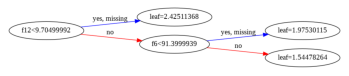

In [11]:
## Fitting XGBoost Regressor Model and calculating the accuracy score of the model ##
reg_model = XGBRegressor()
reg_model.fit(X_train,Y_train)
plot_tree(reg_model, rankdir='LR')

Y_pred = reg_model.predict(X_test)
print('\nAccuracy Score:',reg_model.score(X_test,Y_test))

In [12]:
## Fitting Linear Regression Model and getting the accuracy score of the model ##
lm = linear_model.LinearRegression()
lm.fit(X_train,Y_train)

Y_pred1 = lm.predict(X_test)
print("Linear Regression Accuracy Score:",lm.score(X_test,Y_test))

Linear Regression Accuracy Score: 0.7830668692915166
